# Importando Base de Dados

In [26]:
import pandas as pd

In [27]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [ ]:
dados.columns

In [29]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
    }

In [30]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.sobremesa.unique()

In [33]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

In [35]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.dia_da_semana.unique()

In [38]:
dias = {'Sun': 'Domingo', 
        'Sat': 'Sábado', 
        'Thur': 'Quinta', 
        'Fri': 'Sexta'
        }

In [39]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.hora_do_dia.unique()

In [45]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
        }

In [46]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head(244)

In [ ]:
gorjetas.hora_do_dia.unique()

# Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

# Análise 1 - Valor da Conta e Gorjeta

In [53]:
gorjeta.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

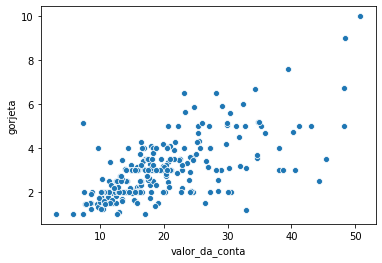

In [57]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente,  o valor da gorjeta aumenta de acordo com o da conta**

In [63]:
print('a base de dados contém ' + str(gorjetas.shape[0]) + ' registros')
print('Registros não-nulos')
gorjetas.count()

a base de dados contém 244 registros
Registros não-nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [64]:
gorjetas.head(
)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [65]:
gorjetas['porcentagem'] = gorjetas.gorjeta/gorjetas.valor_da_conta

In [ ]:
gorjetas.head()

In [67]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [69]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


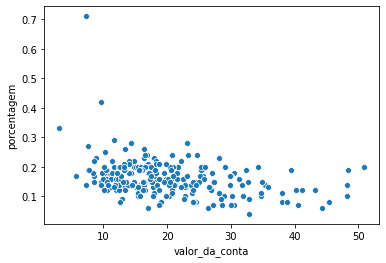

In [70]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional à gorjeta**

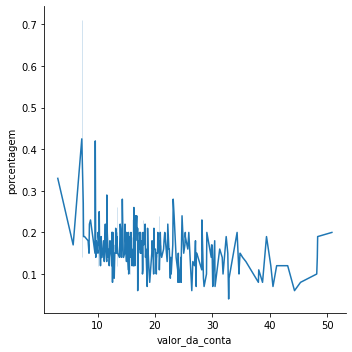

In [73]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

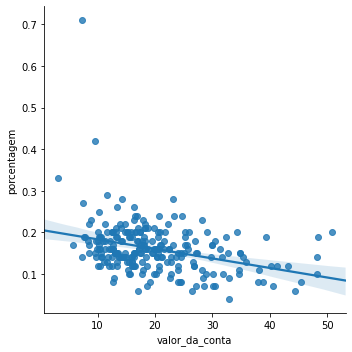

In [74]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [84]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [85]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


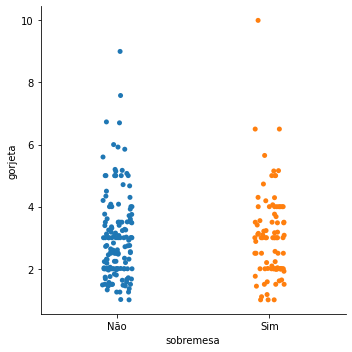

In [81]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

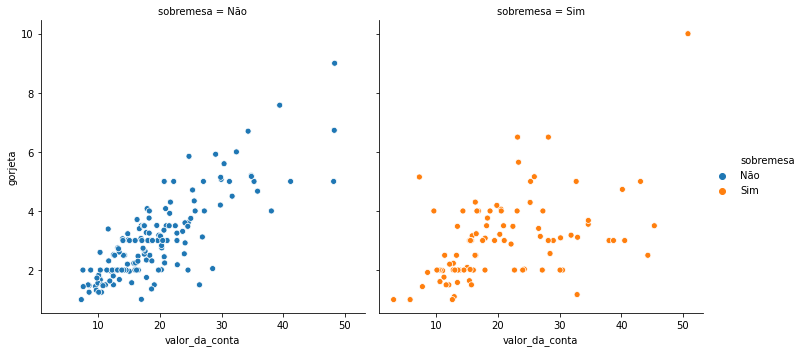

In [83]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

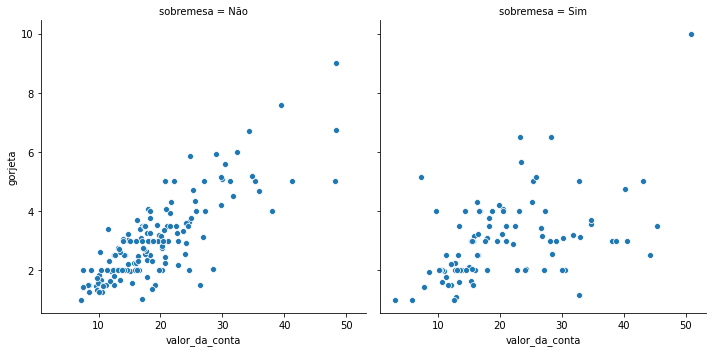

In [86]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

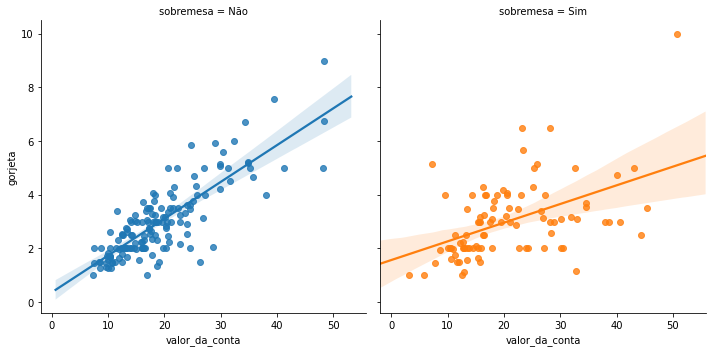

In [88]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

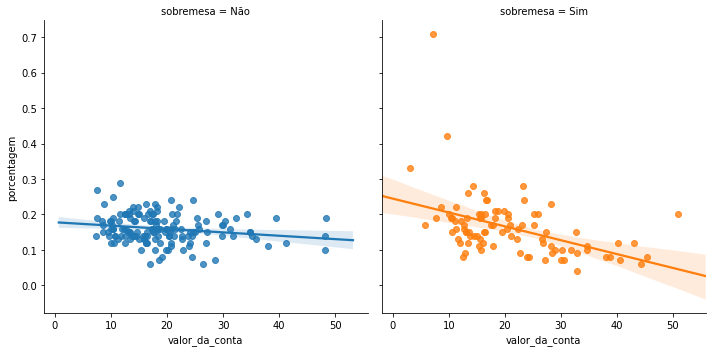

In [89]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

**Visualmente, existe uma difereça no valor da gorjeta entre aqueles que pediram sobremesa em relação aos que não**

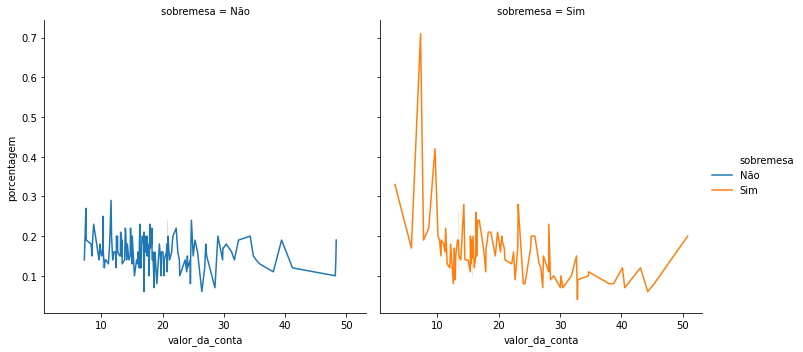

In [93]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [95]:
from scipy.stats import ranksums

In [99]:
sobremesa = gorjetas.query("sobremesa=='Sim'")['porcentagem']

In [100]:
sem_sobremesa = gorjetas.query("sobremesa=='Não'")['porcentagem']

In [103]:
r = ranksums(sobremesa, sem_sobremesa)
print('o valor do pvalue é {}'.format(r.pvalue))

o valor do pvalue é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [104]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [105]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

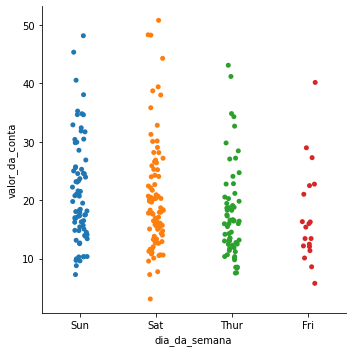

In [106]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjeta)

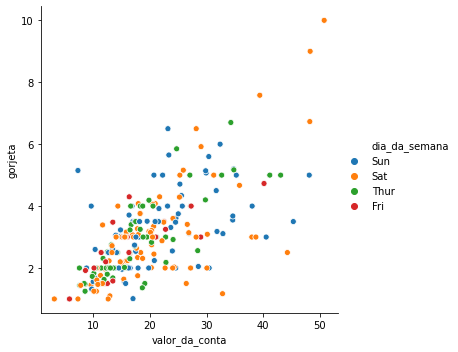

In [108]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjeta)

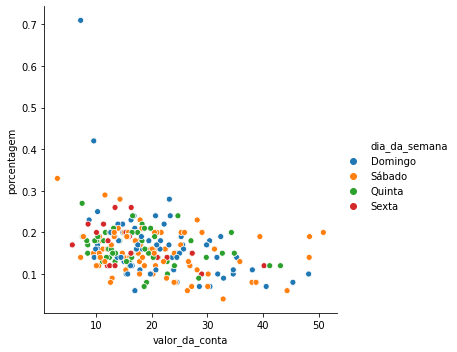

In [111]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

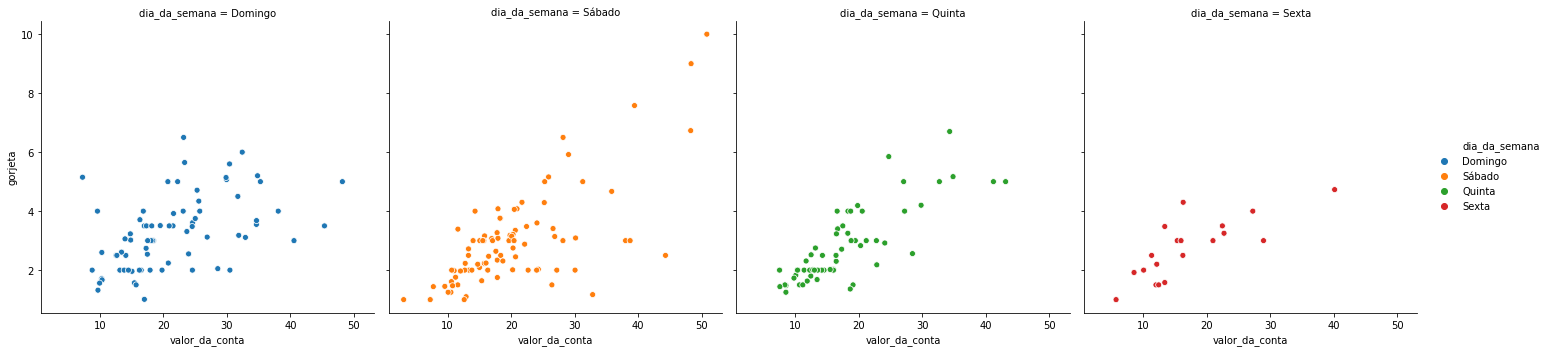

In [114]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

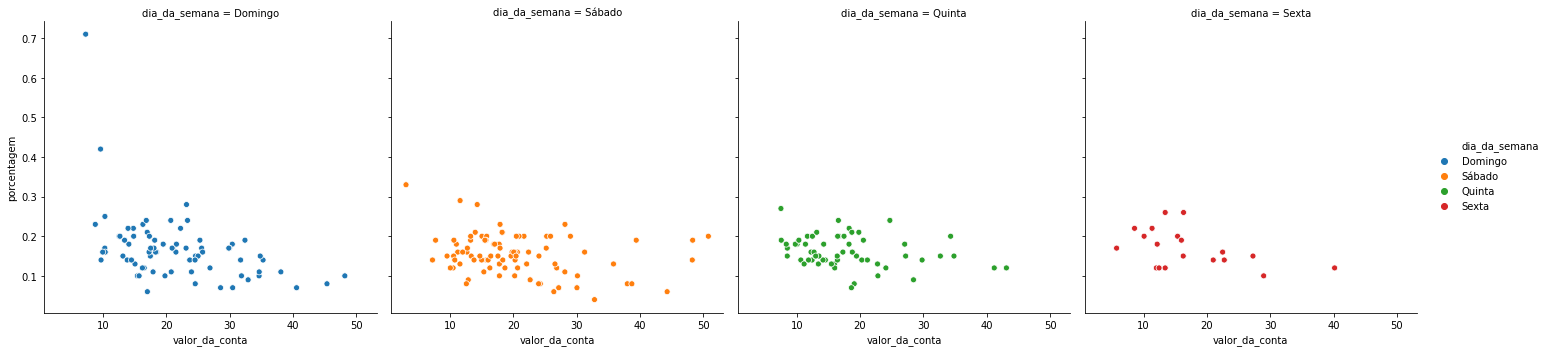

In [113]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

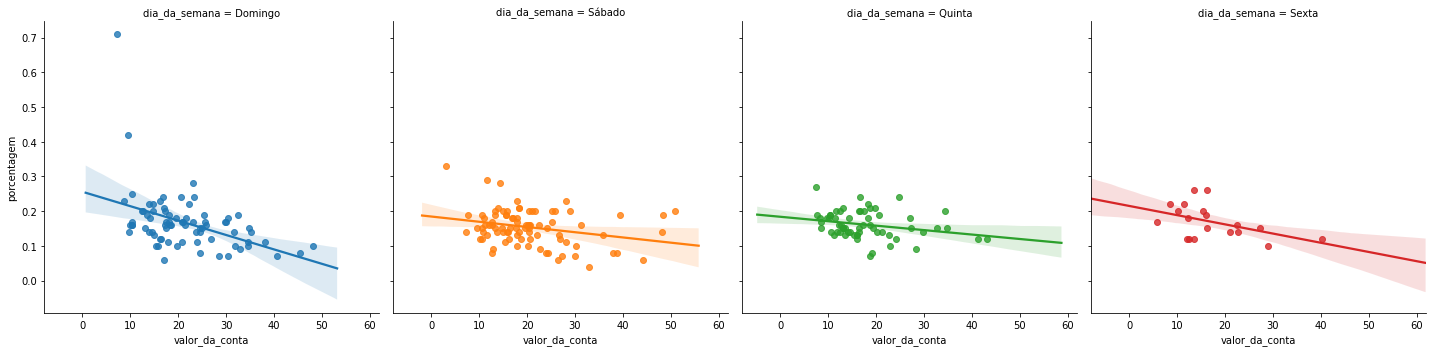

In [115]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [117]:
média_geral_gorjetas = gorjetas.gorjeta.mean()

In [119]:
print('a média geral das gorjetas é de {}'.format(média_geral_gorjetas))

a média geral das gorjetas é de 2.9982786885245902


In [123]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [125]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é a mesma no sábado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é a mesma no sábado e no domingo**

In [128]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [129]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [133]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

**H<sup>null</sup>**

>**A distribuição do valor da conta é a mesma no sábado e no domingo**

In [135]:
print('o valor do pvalue é {}'.format(r2.pvalue))

o valor do pvalue é 0.3576728477868443


# Análise 4 - Hora do dia

In [136]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

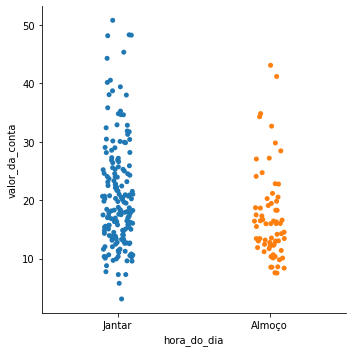

In [137]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

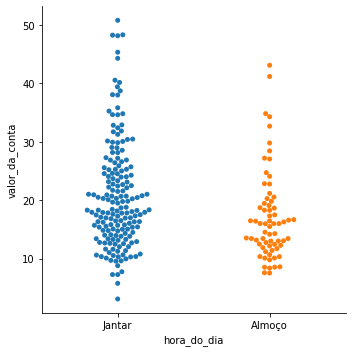

In [138]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

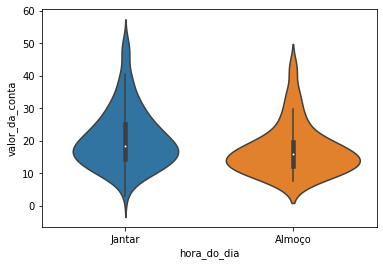

In [139]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

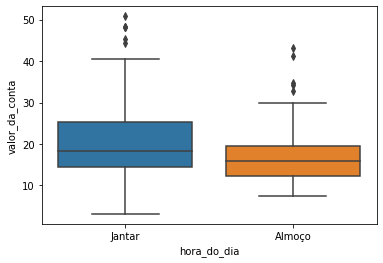

In [140]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [142]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

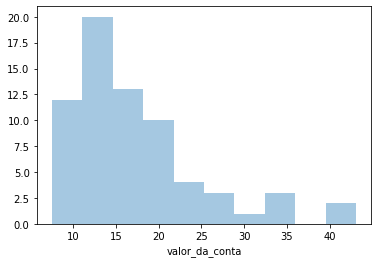

In [145]:
sns.distplot(almoco, kde=False)

In [147]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

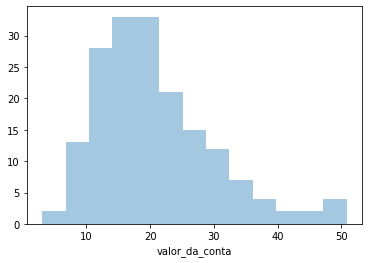

In [148]:
sns.distplot(jantar, kde=False)

In [151]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é a mesma no almoço e no jantar**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é a mesma no almoço e no jantar**

In [154]:
r2 = ranksums(jantar, almoco)

In [155]:
print('o valor do pvalue é de {}'.format(r2.pvalue))

o valor do pvalue é de 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é a mesma no almoço e no jantar**

## Teste de Hipótese 2

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma no almoço e no jantar**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma no almoço e no jantar**

In [164]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [165]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [167]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('o valor do pvalue é de {}'.format(r3.pvalue))

o valor do pvalue é de 0.2602493995587126


**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma no almoço e no jantar**